<a href="https://colab.research.google.com/github/balexandermunoz/AprendizajeEstadistico/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TAREA:**
Entrene 1000 instancias de de regresión lineal donde los datos para cada una de las instancias están definidos por

```python
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)
```

De los estimados obtenidos para los parámetros de cada instancia de regresión, calcule el promedio y la desviación estándar, además grafique sus datos en un histograma y un diagrama de cajas.
Discuta sus resultados: el valor del promedio y la desviación estándar, la forma de la distribución resultante...

Coeficientes:
Mean:  3.000127894246289 Std:  0.052073456438826944
Interceptos: 
Mean:  4.499746569411249 Std:  0.06051198775829943



Text(0.5, 1.0, 'Interceptos')

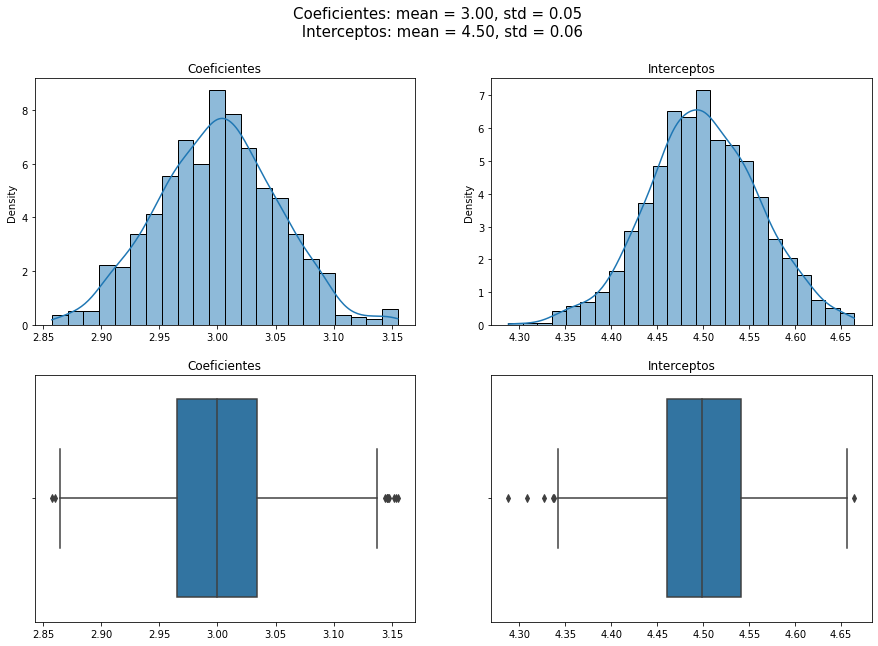

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

Coefs = []
Intercepts = []

for _ in range(1000):
  #Datos:
  x = 2 * np.random.rand(100,1)
  y = 4 + 3 * x + np.random.rand(100,1)

  #Entrenamiento:
  linear_regression = LinearRegression()
  model = linear_regression.fit(x,y)

  #Meter los datos en listas:
  Coefs.append(model.coef_[0][0])
  Intercepts.append(model.intercept_[0])

#Promedios y desviaciones estándar: 
Coefs_Mean = np.mean(Coefs)
Coefs_Std = np.std(Coefs)

Intercepts_Mean = np.mean(Intercepts)
Intercepts_Std = np.std(Intercepts)

print('Coeficientes:')
print('Mean: ', Coefs_Mean, 'Std: ', Coefs_Std)
print('Interceptos: ')
print('Mean: ', Intercepts_Mean, 'Std: ', Intercepts_Std)
print()
#Gráficas:
fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.suptitle(f'Coeficientes: mean = {Coefs_Mean:.2f}, std = {Coefs_Std:.2f} \n Interceptos: mean = {Intercepts_Mean:.2f}, std = {Intercepts_Std:.2f}',size=15)
ax0,ax1,ax2,ax3 = ax[0][0],ax[0][1],ax[1][0],ax[1][1]

sns.histplot(ax=ax0,x=Coefs,kde=True, stat="density")
ax0.set_title('Coeficientes')

sns.histplot(ax=ax1,x=Intercepts,kde=True, stat="density")
ax1.set_title('Interceptos')

sns.boxplot(ax=ax2,x=Coefs)
ax2.set_title('Coeficientes')

sns.boxplot(ax=ax3,x=Intercepts)
ax3.set_title('Interceptos')

## **Discusión:**

Vemos que la gráfica se ajusta bastante bien a una distribución normal centrada en 3 que es justamente la pendiente fijada en las ecuaciones del inicio. Así mismo para los interceptos tenemos una distribución normal centrada en 4.5 que es el intercepto fijado más el promedio de números aleatorios distribuidos de manera uniforme entre 0 y 1, es decir 4 + 0.5. Recordemos que ```numpy.random.rand(n)``` produce n números aleatorios uniformemente distribuídos entre [0,1), y el promedio de estos será 0.5.   


Respecto a la desviación estándar vemos que en ambos casos es pequeña, de aproximadamente 0.05, denotanto así poca varianza en el modelo. Teóricamente, la desviación estándar de la distribución uniforme de los números aleatorios puestos de 0 a 1 es $$ \sigma = \sqrt{\frac{(b-a)^2}{12}} = \sqrt{\frac{1}{3}} \approx 0.57  $$

Esto es para solo una iteracción, sin embargo, la desviación estándar de los valores recopilados por las 1000 iteraciones son bastante cercanos entre sí, es decir, las mil iteracciones siempre predicen valores muy cercanos para interceptos y pendientes. De todo esto podemos concluir que el modelo tiene una varianza bastante baja. 

Abajo podemos ver la gráfica de la última iteracción.

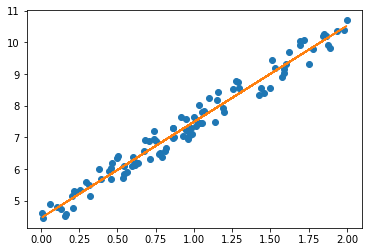

In [ ]:
plt.plot(x,y,'o')
plt.plot(x, x*model.coef_[0][0] + model.intercept_[0] )